<br>
<br>

# N-gram 언어모델

In [1]:
import codecs
from nltk.util import ngrams
import re
import pandas as pd

df = pd.read_excel('뉴스데이터.xlsx')
title = df['title'].values.tolist()
docs = title

In [80]:
print(len(docs))

9369


In [2]:
# 리뷰문장 출력
docs[:10]
clean_docs = []
pattern = '[-=;·+,#/\?:^$.@*..\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]'    # https://jdh5202.tistory.com/394
for i in docs :
    sen = i.split(']')
    if len(sen) >= 2 : # 스플릿 했을때 ] 가 있으면 len이 2 가 나오고 없으면 1이 나옴. 그중 문장을 선택하게 조건문을 부여
        sen = sen[1]
    else :
        sen = sen[0]
    sen = re.sub(pattern,"",sen) # pattern에서 정의한 특수문자 정규표현식 을 제거 
    sen = re.sub('[0-9]+','',sen)
    sen = re.sub('[一-龥]','',sen)
    #sen = re.sub('[ㄱ-ㅣ가-힣]+','',sen)
    #sen = re.sub('[a-zA-Z]','',sen)
    sen = sen.strip() # 양옆의 공백을 제거 
    clean_docs.append(sen)
    

In [3]:
clean_docs

['세계무역센터 어떤 곳인가',
 '미국주요도시 동시다발 테러공격',
 '뉴욕 세계무역센터 빌딩 비행기 충돌',
 '럼즈펠드  국방 관료주의와의 전면전 선언',
 '짧고 쉽게 답변자신감 보여줘야  성공취업인터뷰 요령',
 '소피아 로렌과 미녀들',
 '공교육 성공신화 호브파크 스쿨',
 '엔화 엔대로 급등엔캐리 트레이드 청산 가속',
 '예루살렘 성벽 밝힌 빛 축제',
 '동물 난자에 사람 유전자 주입의회 교잡배아 허용',
 '뉴욕도 공교육 개혁중  누구도 뒤처지지 않게 하라',
 '관심끄는 월 워싱턴 G 금융정상회담',
 '기업 실적쇼크 현실로최악 경기침체 우려 커져',
 'G 정상회담 내달 일 워싱턴서 열린다',
 '뉴질랜드 기준금리 P 인하',
 '주요은행 부분 국유화  억 투입',
 '거래소도 관광지',
 '조국과 경제를 위해 사인하시오재무부 개 은행 부분 국유화 회의 막전막후',
 '오바마 경제카드로 표심 흔들까',
 '각국 정상들 발에서 땀날라',
 '이번엔 중국산 농약 콩 파문 주부 구토호흡곤란 호소',
 '부실자산 관리 뉴욕멜론 에',
 '아시아서도 예금  보장 확산',
 '캐나다 하퍼 총리 재집권',
 '현 금융위기 년전 예측한 루비니 뉴욕대 교수',
 '폴슨 재무 바통은 누가',
 '벌크선 운임 급락세',
 '트럼프 비필수적 이동 캐나다 국경 폐쇄',
 '도 처럼  동원코로나 임시 병원 짓는다',
 '바이든  민주당 대선 후보 굳혀',
 '유럽 이어  공장 멈춘다우버는 카풀 중단',
 '트럼프 또 중국 바이러스 미국 기자 추방',
 '“이동 말라” 국경 막는 EU',
 '전세계 연일 돈풀기리먼 때 처방 뛰어넘었다',
 '급기야 헬리콥터 머니 뿌리는 트럼프Fed는 CP 사들여 부도 차단',
 '이탈리아 정부 벼랑끝 항공사 떠안겠다코로나에 국유화 선언',
 '코로나 확산에 은 가격도 하락',
 '보다 악화된 유럽 코로나안이한 방역과 문화가 화 불러',
 '억파운드스페인 억유로유로존 유로 실탄 장전',
 '돈다발로는 사람경제 못 구해코로나 치료제 

In [4]:
docs = clean_docs

In [5]:
from konlpy.tag import Okt
from tqdm import tqdm
from konlpy.tag import Mecab
tagger=Mecab('C:/mecab/mecab-ko-dic')

#tagger = Okt()
sentence_bigram = []

# 데이터의 일부분만 사용
#docs = docs[:10000]

# 형태소분석 수행
# tqdm() : 진행상황 표시

# http://kkma.snu.ac.kr/documents/?doc=postag 참고
josa=['JKS','JKC','JKG','JKO','JKB','JKV','JKQ','JX','JC']                    # 조사
jeop_misa_and_doosa=['XSN','XSV','XSA','XPN']                                 # 접미사
boosa=['MAG','MAJ']                                                           # 부사
eomaleomy=['EF','EC','ETN','ETM','EP']                                        # 어말어미   (EP는 선어말어미)

for doc in tqdm(docs):
    p = tagger.pos(doc)
    tokens=[]
    
    for j in p:
        i=j[1]
        if (i in josa) | (i in jeop_misa_and_doosa) | (i in boosa) | (i in eomaleomy):
            continue
        tokens.append(j[0])
        
    bigram = ngrams(tokens, 2, pad_left=False, pad_right=False)
                    #left_pad_symbol="SS", right_pad_symbol="SE")
        
    sentence_bigram += [t for t in bigram]

100%|████████████████████████████████████████████████████████████████████████████| 9369/9369 [00:02<00:00, 3992.37it/s]


In [143]:
tagger.pos('마이크로소프트')

[('마이크', 'NNG'), ('로', 'JKB'), ('소프트', 'NNG')]

In [103]:
# 예시 1) 
tagger.pos('[한국PC통신, 창립6돌 사업계획 발표] 2천년까지 730억 투기')

[('[', 'SSO'),
 ('한국', 'NNP'),
 ('PC', 'SL'),
 ('통신', 'NNG'),
 (',', 'SC'),
 ('창립', 'NNG'),
 ('6', 'SN'),
 ('돌', 'NNG'),
 ('사업', 'NNG'),
 ('계획', 'NNG'),
 ('발표', 'NNG'),
 (']', 'SSC'),
 ('2', 'SN'),
 ('천', 'NR'),
 ('년', 'NNBC'),
 ('까지', 'JX'),
 ('730', 'SN'),
 ('억', 'NR'),
 ('투', 'NR'),
 ('기', 'NNBC')]

In [8]:
# 바이그램 출력
len(sentence_bigram)

59282

In [9]:
# 뉴스데이터의 단어들의 빈도수를 보기위한 과정
sentence_monogram=[]
for doc in tqdm(docs):
    p=tagger.pos(doc)
    tokens=[]
    
    for j in p:
        i=j[1]
        if (i in josa) | (i in jeop_misa_and_doosa) | (i in boosa) | (i in eomaleomy):
            continue
        tokens.append(j[0])
    #tokens = tagger.morphs(doc)
    
    for t in tokens:
        sentence_monogram.append(t)

100%|███████████████████████████████████████████████████████████████████████████| 9369/9369 [00:00<00:00, 21844.20it/s]


In [10]:
sentence_monogram
print(len(sentence_monogram))

68643


In [11]:
# #m=tagger.pos('오바마 경제카드로 표심 흔들까')
# #print(tagger.pos('오바마 경제카드로 표심 흔들까'))
# m=tagger.pos('미국 기업들 호황속 마른수건 쥐어짜기')
# print(m)


      
# josa=['JKS','JKC','JKG','JKO','JKB','JKV','JKQ','JX','JC']                    # 조사
# jeop_misa_and_doosa=['XSN','XSV','XSA','XPN']                                 # 접미사
# boosa=['MAG','MAJ']                                                           # 부사
# eomaleomy=['EF','EC','ETN','ETM','EP']                                        # 어말어미   (EP는 선어말어미)

# ans=[]
# for j in m:
#     i=j[1]
#     if (i in josa) | (i in jeop_misa_and_doosa) | (i in boosa) | (i in eomaleomy):
#         continue
#     ans.append(j[0])
# print()
# print(ans)

In [12]:
# tagger.pos('유입 및 유출 등이 가장 관건')

In [13]:
from nltk import ConditionalFreqDist

# 조건 빈도수 구함
cfd = ConditionalFreqDist(sentence_bigram)

# 특정 단어 다음에 가장 자주 나오는 단어 (조건부 빈도수) - 예시
print('SK ->', cfd["SK"].most_common(5))
print('나 ->', cfd["나"].most_common(20))
print('의 ->', cfd["의"].most_common(5))
print('삼성 ->', cfd["삼성"].most_common(5))
print('감사>', cfd["감사"].most_common(20))

SK -> [('텔레콤', 6), ('에너지', 5), ('주', 4), ('텔', 3), ('상사', 3)]
나 -> [('년', 2), ('대통령', 1), ('노동', 1), ('IMF', 1), ('증가', 1), ('히트', 1), ('엔', 1), ('예', 1), ('공동운항', 1), ('숙녀', 1), ('르', 1), ('결국', 1), ('하나', 1), ('포스', 1), ('상상', 1), ('채권', 1), ('환율', 1), ('상승', 1), ('벨소리', 1), ('앞서', 1)]
의 -> [('축복', 1), ('전쟁', 1), ('최대공약수', 1)]
삼성 -> [('경제', 10), ('SDS', 10), ('중공업', 9), ('자동차', 9), ('화재', 7)]
감사> [('마음', 2), ('등', 2), ('인', 2), ('의견', 2), ('황용하', 1), ('감사원', 1), ('반', 1), ('선임', 1), ('이왕종', 1), ('주', 1), ('솜방망이', 1), ('보고서', 1)]


In [14]:
# 단어 : 빈도수 데이터프레임 만들기
freq=[]
sentence_monogram=set(sentence_monogram)
for i in sentence_monogram:
    freq.append(sum(cfd[i].values()))

In [15]:
print(len(sentence_monogram))
print(len(freq))

12285
12285


In [16]:
df = pd.DataFrame({'Frequency':freq})
df.index=list(sentence_monogram)
df = df.sort_values(by='Frequency', ascending=False)
df

,Frequency
기업,417
등,386
한국,371
금융,337
일,316
...,...
알티마,0
연혁,0
재,0
경신,0


In [17]:
# 예시)
df.loc['LG'].Frequency

275

In [18]:
cfd['사람'].most_common()[0]

('정보', 2)

(array([195.,  13.,   1.,   3.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <a list of 10 Patch objects>)

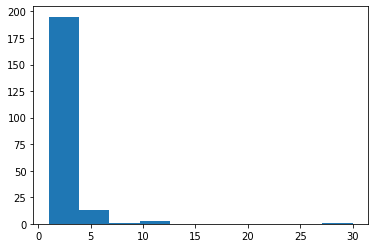

In [19]:
import numpy as np
from matplotlib import pyplot as plt

t=cfd['한국'].values()
plt.hist(t)

In [20]:
#  for i in df.index:
#     print(i,' -> ',cfd[i].most_common(10))

In [21]:
d={}
for i in df.index:
    sub=[]
    d[i]=[]
    for p in cfd[i].most_common():
        if p[1]==1:
            break
        sub.append(p)
    d[i]+=sub

In [22]:
test=[x[1] for x in d['한국']]
test=np.array(test)
sum(test)

207

In [45]:
#first = cfd[df.index[1]].most_common(10)[1][0] #index1번단어의 뒤에오는 10개 단어중 첫번째 단어
#df.index[1] + first
 
compound_word2 = [] 
frequency_word=[]

lst=[]

max_column_len=0
for j in range(len(df.index)):
    compound_word = [df.index[j]]
    test=[x[1] for x in d[df.index[j]]]    # 사전(d)내 키의 값들을 모두 더해서 빈도수를 만들고 그것을 frequency_word에 담음
    if sum(test)==0:
        continue
    frequency_word.append(sum(test))
    max_column_len=max(max_column_len,len(d[df.index[j]]))
    
    for i in d[df.index[j]]:
        word = i[0]
        compound = df.index[j] + ' ' + word +' ' +'(' + str(i[1]) +')'             
        lst.append((df.index[j]+word,i[1]))
        #compound = re.sub('[^\w\s]',"",compound) 
        #compound = re.sub('[a-zA-Z]',"",compound)
        #print(compound)
        compound_word.append(compound)
    compound_word2.append(compound_word) 

In [24]:
max_column_len

57

In [25]:
# compound_word2

In [26]:
df2 = pd.DataFrame(compound_word2)
df2=df2.rename(columns = {0: "Word"})     

In [27]:
#frequency_word
df2.insert(1, 'Total_Frequency', frequency_word)

In [28]:
print(len(frequency_word))

1910


In [29]:
df2

,Word,Total_Frequency,1,2,3,4,5,6,7,8,...,48,49,50,51,52,53,54,55,56,57
0,기업,181,기업 은행 (13),기업 경영 (8),기업 자금난 (8),기업 구조 (7),기업 대출 (6),기업 선정 (6),기업 지원 (5),기업 모집 (5),...,기업 엔 (2),기업 개사 (2),기업 년 (2),기업 환 (2),기업 개발 (2),기업 세무 (2),기업 MA (2),기업 금융 (2),기업 도산 (2),기업 전자 (2)
1,등,133,등 개 (22),등 개사 (8),등 공동 (5),등 논의 (4),등 억 (4),등 환율 (4),등 잇단 (4),등 투자 (4),...,None,None,None,None,None,None,None,None,None,None
2,한국,207,한국 경제 (30),한국 기업 (12),한국 투자 (11),한국 금융 (10),한국 무역 (8),한국 중공업 (6),한국 IBM (6),한국 신용 (6),...,한국 오라클 (2),한국 WTO (2),None,None,None,None,None,None,None,None
3,금융,226,금융 기관 (36),금융 위기 (33),금융 시장 (15),금융 사 (12),금융 안정 (9),금융 감독원 (7),금융 감독 (7),금융 불안 (6),...,None,None,None,None,None,None,None,None,None,None
4,일,150,일 일 (15),일 개 (6),일 일간 (6),일 만 (5),일 대 (5),일 개막 (5),일 코엑스 (5),일 개발 (4),...,일 매듭 (2),일 드 (2),일 신라호텔 (2),일 인터넷 (2),None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,각의,2,각의 통과 (2),None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1906,장기채,2,장기채 발행 (2),None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1907,다림,2,다림 시스템 (2),None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1908,소환,2,소환 조사 (2),None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [59]:
lst=sorted(lst,key=lambda x : x[1],reverse=True)
top_1000=lst[:1000]
top_1000

Frequency_df=pd.DataFrame()
compound_word=[]
freqs=[]
for i in top_1000:
    compound_word.append(i[0])
    freqs.append(i[1])
Frequency_df=pd.DataFrame({'단어':compound_word,'빈도수':freqs})
Frequency_df

,단어,빈도수
0,억달러,97
1,구조조정,96
2,억원,63
3,정보통신,58
4,LG전자,49
...,...,...
995,협조융자협약,4
996,무기한,4
997,모건스탠리,4
998,금전신탁,4


In [60]:
# Frequency_df.to_excel('./Bi_Gram_By_Mecab_Top1000.xlsx',encoding='utf-8-sig')        # 처음 한번만 해주기

In [47]:
df2 = df2.sort_values(by='Total_Frequency', ascending=False)
df2

,Word,Total_Frequency,1,2,3,4,5,6,7,8,...,48,49,50,51,52,53,54,55,56,57
6,억,245,억 달러 (97),억 원 (63),억 천만 (17),억 지원 (12),억 투자 (8),억 이상 (5),억 투 (4),억 유로 (4),...,None,None,None,None,None,None,None,None,None,None
3,금융,226,금융 기관 (36),금융 위기 (33),금융 시장 (15),금융 사 (12),금융 안정 (9),금융 감독원 (7),금융 감독 (7),금융 불안 (6),...,None,None,None,None,None,None,None,None,None,None
10,LG,214,LG 전자 (49),LG 산전 (18),LG 화학 (17),LG 정보 (16),LG 반도체 (14),LG 텔레콤 (12),LG 카드 (9),LG 경제 (7),...,None,None,None,None,None,None,None,None,None,None
2,한국,207,한국 경제 (30),한국 기업 (12),한국 투자 (11),한국 금융 (10),한국 무역 (8),한국 중공업 (6),한국 IBM (6),한국 신용 (6),...,한국 오라클 (2),한국 WTO (2),None,None,None,None,None,None,None,None
0,기업,181,기업 은행 (13),기업 경영 (8),기업 자금난 (8),기업 구조 (7),기업 대출 (6),기업 선정 (6),기업 지원 (5),기업 모집 (5),...,기업 엔 (2),기업 개사 (2),기업 년 (2),기업 환 (2),기업 개발 (2),기업 세무 (2),기업 MA (2),기업 금융 (2),기업 도산 (2),기업 전자 (2)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,바이트,2,바이트 댄스 (2),None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1759,모럴,2,모럴 해저드 (2),None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1760,샌디스크,2,샌디스크 인수 (2),None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1617,잊,2,잊 만 (2),None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [31]:
# df3=pd.DataFrame(df2['Total_Frequency'])
# df3.index=df2['Word']
# df3

,Total_Frequency
Word,
억,245
금융,226
LG,214
한국,207
기업,181
...,...
제로,2
권고,2
도산,2


In [32]:
# df3.to_excel('./News_Frequency_By_Mecab_test.xlsx',encoding='utf-8-sig')  # 처음 한번만 해주기
# df2.to_excel('./Bi_Gram_By_Mecab_test.xlsx',encoding='utf-8-sig')        # 처음 한번만 해주기

In [33]:
############################################################################################3

In [34]:
# print(cfd["SK"].most_common(20))
# print(cfd["LG"].most_common(20))

# compound_word = []
# for i in cfd['LG'].most_common(10):
#     word = i[0]
#     compound = 'LG' + word 
#     #print(compound)
#     compound_word.append(compound)
# compound_word

In [35]:
# from nltk.probability import ConditionalProbDist, MLEProbDist

# # 조건 확률 구함 (조건부 확률)
# cpd = ConditionalProbDist(cfd, MLEProbDist)

# # '이->영화'가 '영화->이'보다 확률이 높음
# print(cpd["이"].prob("영화"))
# print(cpd["영화"].prob("이"))


In [36]:
# import random

# # 문장 생성
# def generate_sentence(cpd, seed=None):
    
#     # 랜덤시드로 초기화
#     if seed is not None:
#         random.seed(seed)
    
#     # 문장 초기화
#     sentence = []

#     # 초기 단어 설정
#     word = "SS"
    
#     while True:
#         # 바이그램에 없다면 종료
#         if word not in cpd:
#             break
        
#         # 확률분포에 따라 다음 단어 선택
#         word_next = cpd[word].generate()

#         # 문장의 끝 토큰이면 종료
#         if word_next == "SE":
#             break
        
#         # 단어 추가
#         sentence.append(" " + word_next)
        
#         # 다음 단어 설정
#         word = word_next

#     return "".join(sentence)

In [37]:
# generate_sentence(cpd, 8) # 확률분포에 따라 생성한 문장임 (네이버 댓글에 있는 문장이 아님)
# # 바이그램이라 문맥을 2단어 밖에 못봐서 이상하게 나옴. -> 딥러닝 gpt.2는 입력 시퀀스가 1000개 단어임 문맥고려가 그럴듯하게 된다.

In [38]:
# generate_sentence(cpd, 23)